<a href="https://colab.research.google.com/github/AndreiAf02/STAT561_Project/blob/main/Credit_Default_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [5]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/STAT561_Project/main/'

In [6]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [7]:
# data_orig = pd.read_csv(path_to_data + "Imbalanced_Fine_Tuning.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data + "SRS_Fine_Tuning.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data + "SRSwR_Fine_Tuning.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data + "Sy_Fine_Tuning.csv", sep=",", header=0)
# data_Sym = pd.read_csv(path_to_data + "Sy_multi_Fine_Tuning.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data + "SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data + "Sy_ROS_Fine_Tuning.csv", sep=",", header=0)


data_orig = pd.read_csv("Credit_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
data_SRS = pd.read_csv("Credit_SRS_Fine_Tuning.csv", sep=",", header=0)
data_SRSwR = pd.read_csv("Credit_SRSwR_Fine_Tuning.csv", sep=",", header=0)
data_Sy = pd.read_csv("Credit_Sy_Fine_Tuning.csv", sep=",", header=0)
data_Sym = pd.read_csv("Credit_Sy_multi_Fine_Tuning.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv("Credit_SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv("Credit_Sy_ROS_Fine_Tuning.csv", sep=",", header=0)

# data_orig

Original (imbalanced) data performance:

In [8]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.082037,0.656388
1,1,0.063649,0.700441
2,2,0.083451,0.656388
3,3,0.070721,0.682819
4,4,0.074965,0.674009
5,5,0.065064,0.704846
6,6,0.083451,0.669604
7,7,0.059406,0.709251
8,8,0.065064,0.696035
9,9,0.083451,0.656388


Error type: FPR
Mean: 0.07595473833097593
Variance: 8.919020074674772e-05
Variance of estimate: 1.7838040149349545e-06
Standard error: 0.0013355912604292356
95% Confidence Interval:  [ 0.07333697946053463 ,  0.07857249720141724 ]
-----------------------------
Error type: FNR
Mean: 0.6755947136563876
Variance: 0.0003594251067657166
Variance of estimate: 7.188502135314333e-06
Standard error: 0.0026811382163764576
95% Confidence Interval:  [ 0.6703396827522897 ,  0.6808497445604854 ]
-----------------------------


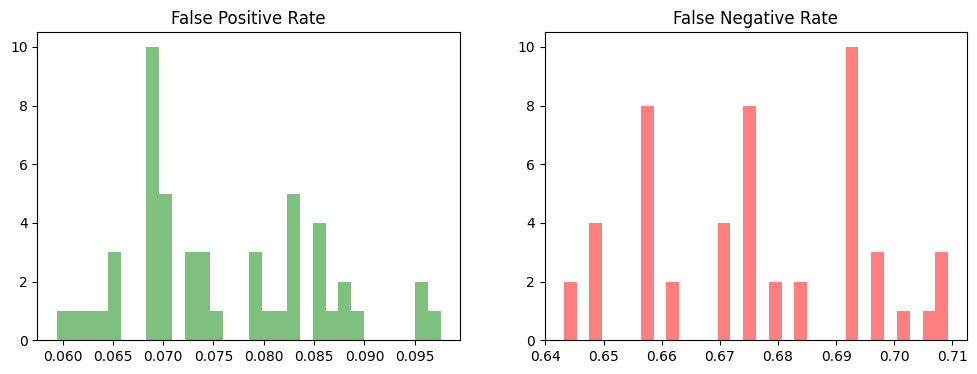

In [9]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.12384724186704378
Variance: 8.995369662862601e-06
Variance of estimate: 1.7990739325725203e-07
Standard error: 0.0004241549165779551
95% Confidence Interval:  [ 0.123015898230551 ,  0.12467858550353657 ]
-----------------------------
Error type: FNR
Mean: 0.5793832599118943
Variance: 1.2863768807023911e-05
Variance of estimate: 2.5727537614047824e-07
Standard error: 0.0005072232015005605
95% Confidence Interval:  [ 0.5783891024369532 ,  0.5803774173868355 ]
-----------------------------


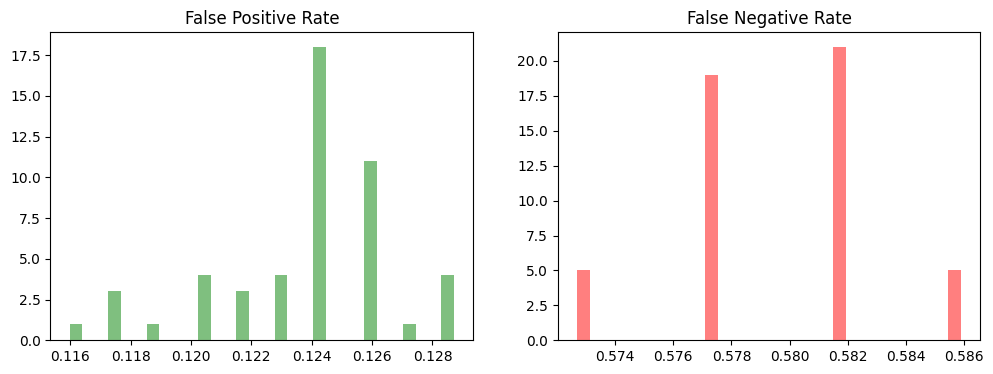

In [10]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.10701555869872698
Variance: 1.4176526208874352e-05
Variance of estimate: 2.8353052417748707e-07
Standard error: 0.0005324758437501997
95% Confidence Interval:  [ 0.10597190604497658 ,  0.10805921135247737 ]
-----------------------------
Error type: FNR
Mean: 0.6120704845814977
Variance: 4.54746900992152e-05
Variance of estimate: 9.09493801984304e-07
Standard error: 0.000953673844657755
95% Confidence Interval:  [ 0.6102012838459685 ,  0.6139396853170269 ]
-----------------------------


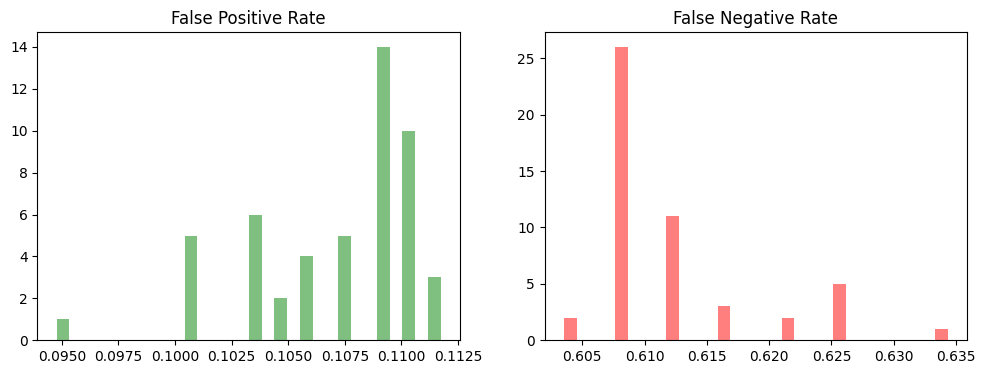

In [11]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.1141442715700141
Variance: 8.757746880374204e-06
Variance of estimate: 1.7515493760748408e-07
Standard error: 0.0004185151581573648
95% Confidence Interval:  [ 0.11332398186002567 ,  0.11496456128000253 ]
-----------------------------
Error type: FNR
Mean: 0.5875770925110132
Variance: 7.833908466839198e-06
Variance of estimate: 1.5667816933678398e-07
Standard error: 0.0003958259331281668
95% Confidence Interval:  [ 0.586801273682082 ,  0.5883529113399444 ]
-----------------------------


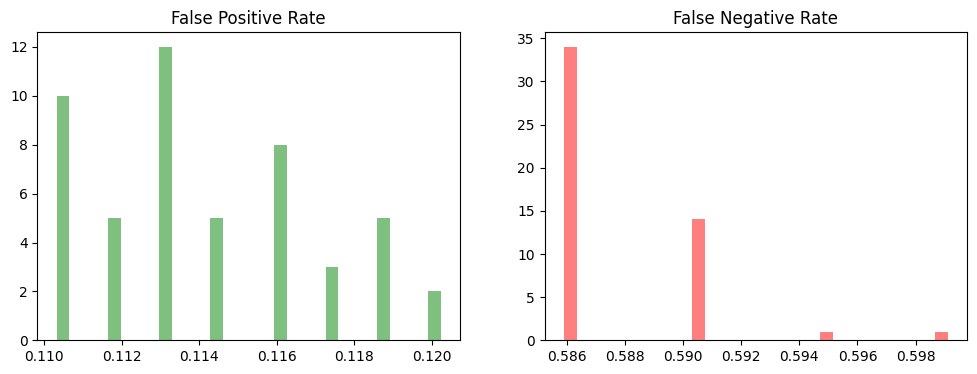

In [12]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.13267326732673262
Variance: 9.145619119831324e-06
Variance of estimate: 1.8291238239662649e-07
Standard error: 0.0004276825720047831
95% Confidence Interval:  [ 0.13183500948560326 ,  0.133511525167862 ]
-----------------------------
Error type: FNR
Mean: 0.579647577092511
Variance: 2.8587033020042862e-05
Variance of estimate: 5.717406604008573e-07
Standard error: 0.0007561353452926647
95% Confidence Interval:  [ 0.5781655518157374 ,  0.5811296023692847 ]
-----------------------------


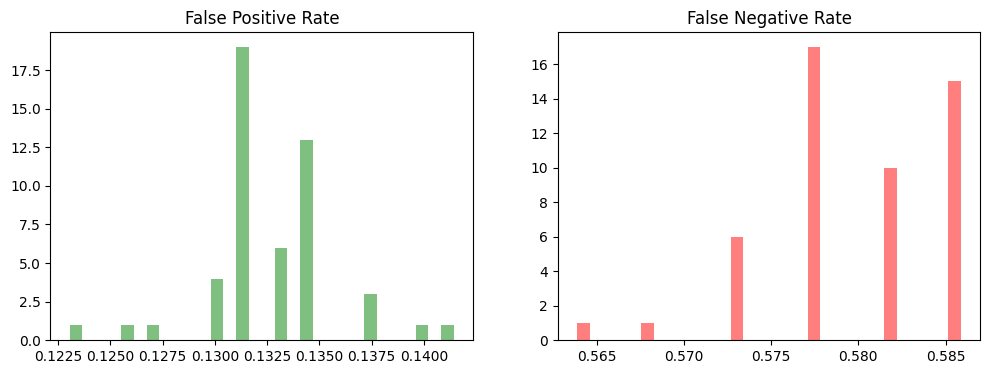

In [13]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.12356435643564354
Variance: 6.751100056706922e-05
Variance of estimate: 1.3502200113413844e-06
Standard error: 0.0011619896778118919
95% Confidence Interval:  [ 0.12128685666713222 ,  0.12584185620415483 ]
-----------------------------
Error type: FNR
Mean: 0.5694273127753304
Variance: 0.00029451218473766107
Variance of estimate: 5.890243694753222e-06
Standard error: 0.002426982425719894
95% Confidence Interval:  [ 0.5646704272209194 ,  0.5741841983297414 ]
-----------------------------


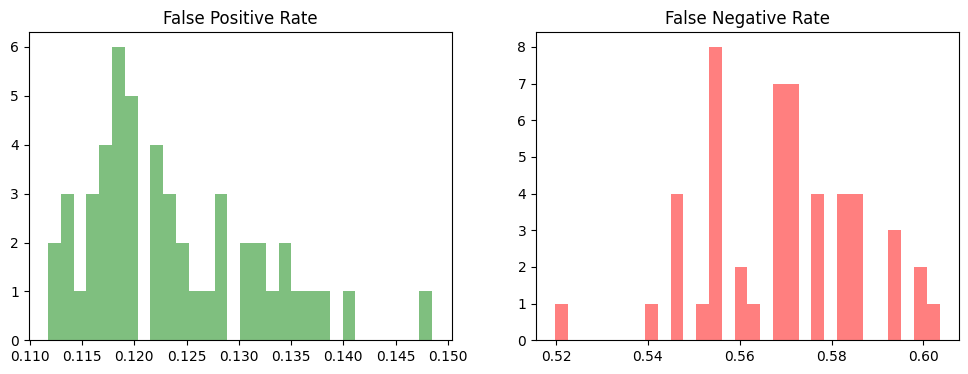

In [14]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.12124469589816121
Variance: 1.4619925421558773e-05
Variance of estimate: 2.9239850843117544e-07
Standard error: 0.0005407388541904266
95% Confidence Interval:  [ 0.12018484774394797 ,  0.12230454405237445 ]
-----------------------------
Error type: FNR
Mean: 0.575330396475771
Variance: 3.3268367604372514e-05
Variance of estimate: 6.653673520874503e-07
Standard error: 0.0008157005284339654
95% Confidence Interval:  [ 0.5737316234400405 ,  0.5769291695115015 ]
-----------------------------


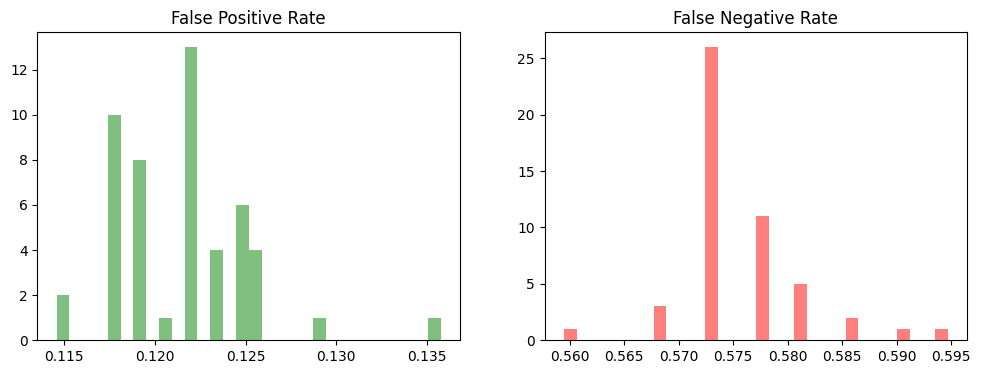

In [15]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [16]:
FPR = pd.DataFrame()

DF = FPR

DF['Orig'] = orig_FPR
DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

<Axes: title={'center': 'FPR'}>

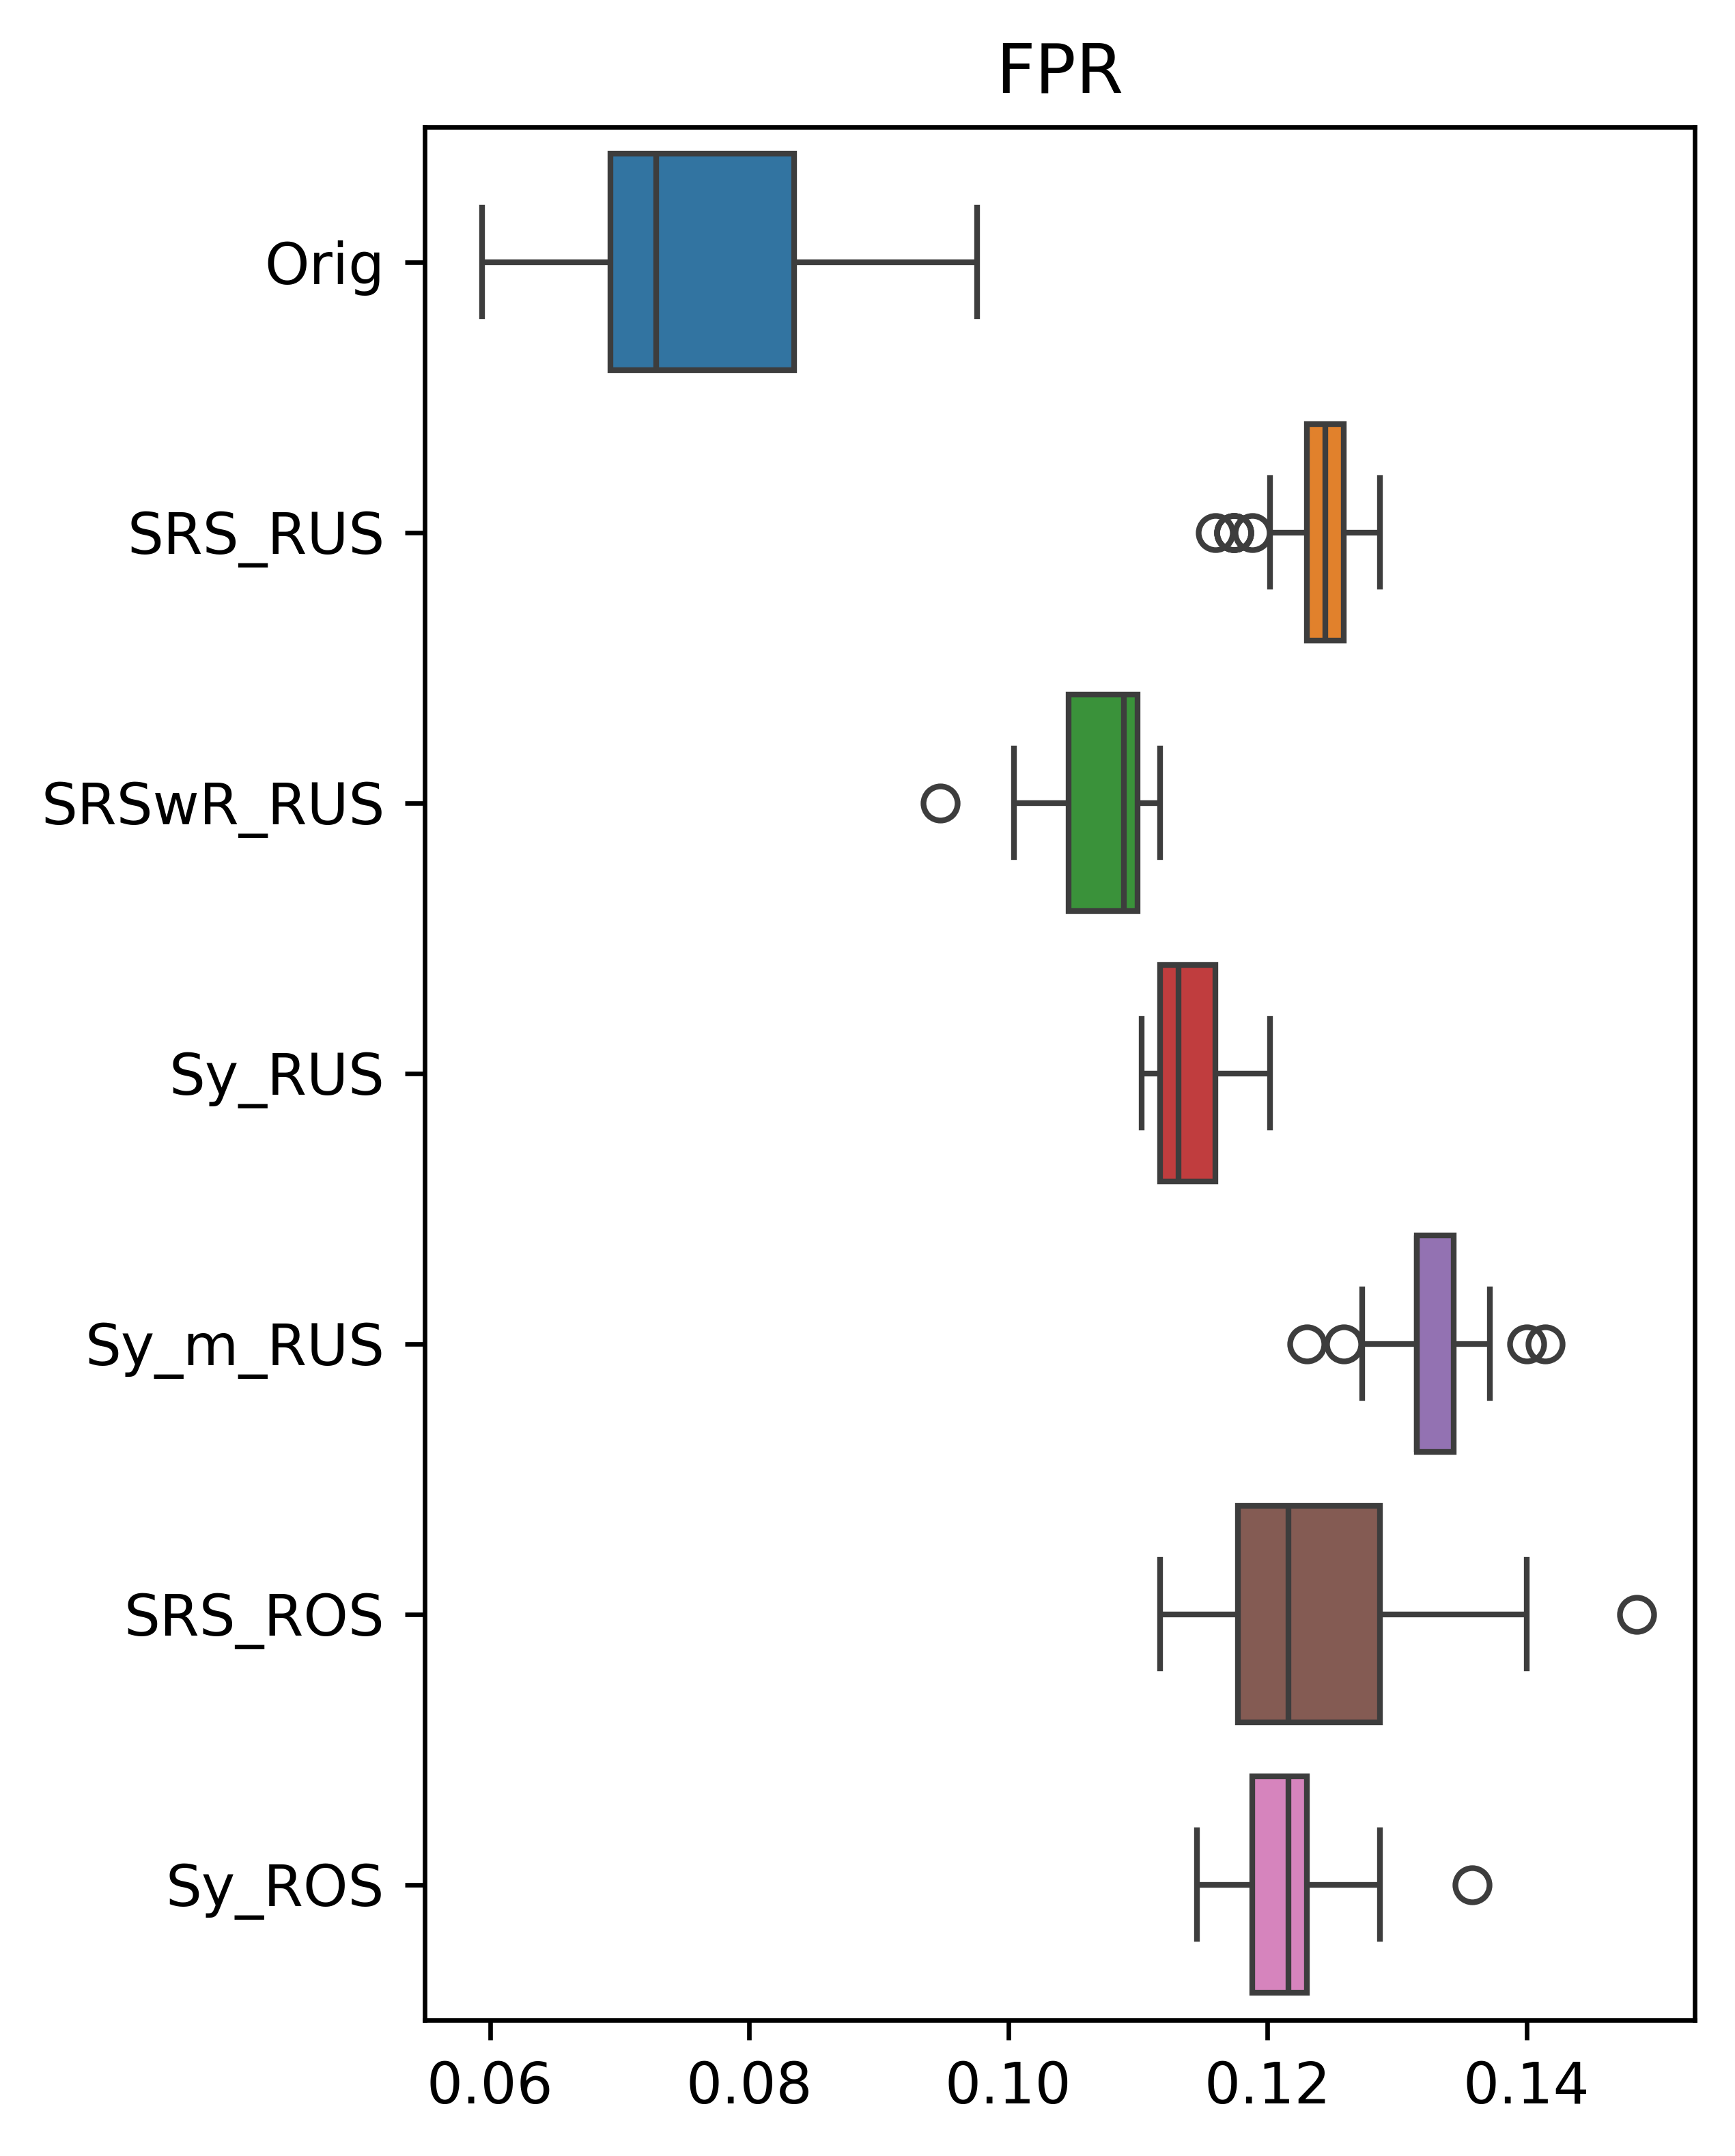

In [17]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [18]:
FNR = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_FNR
DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR

<Axes: title={'center': 'FNR'}>

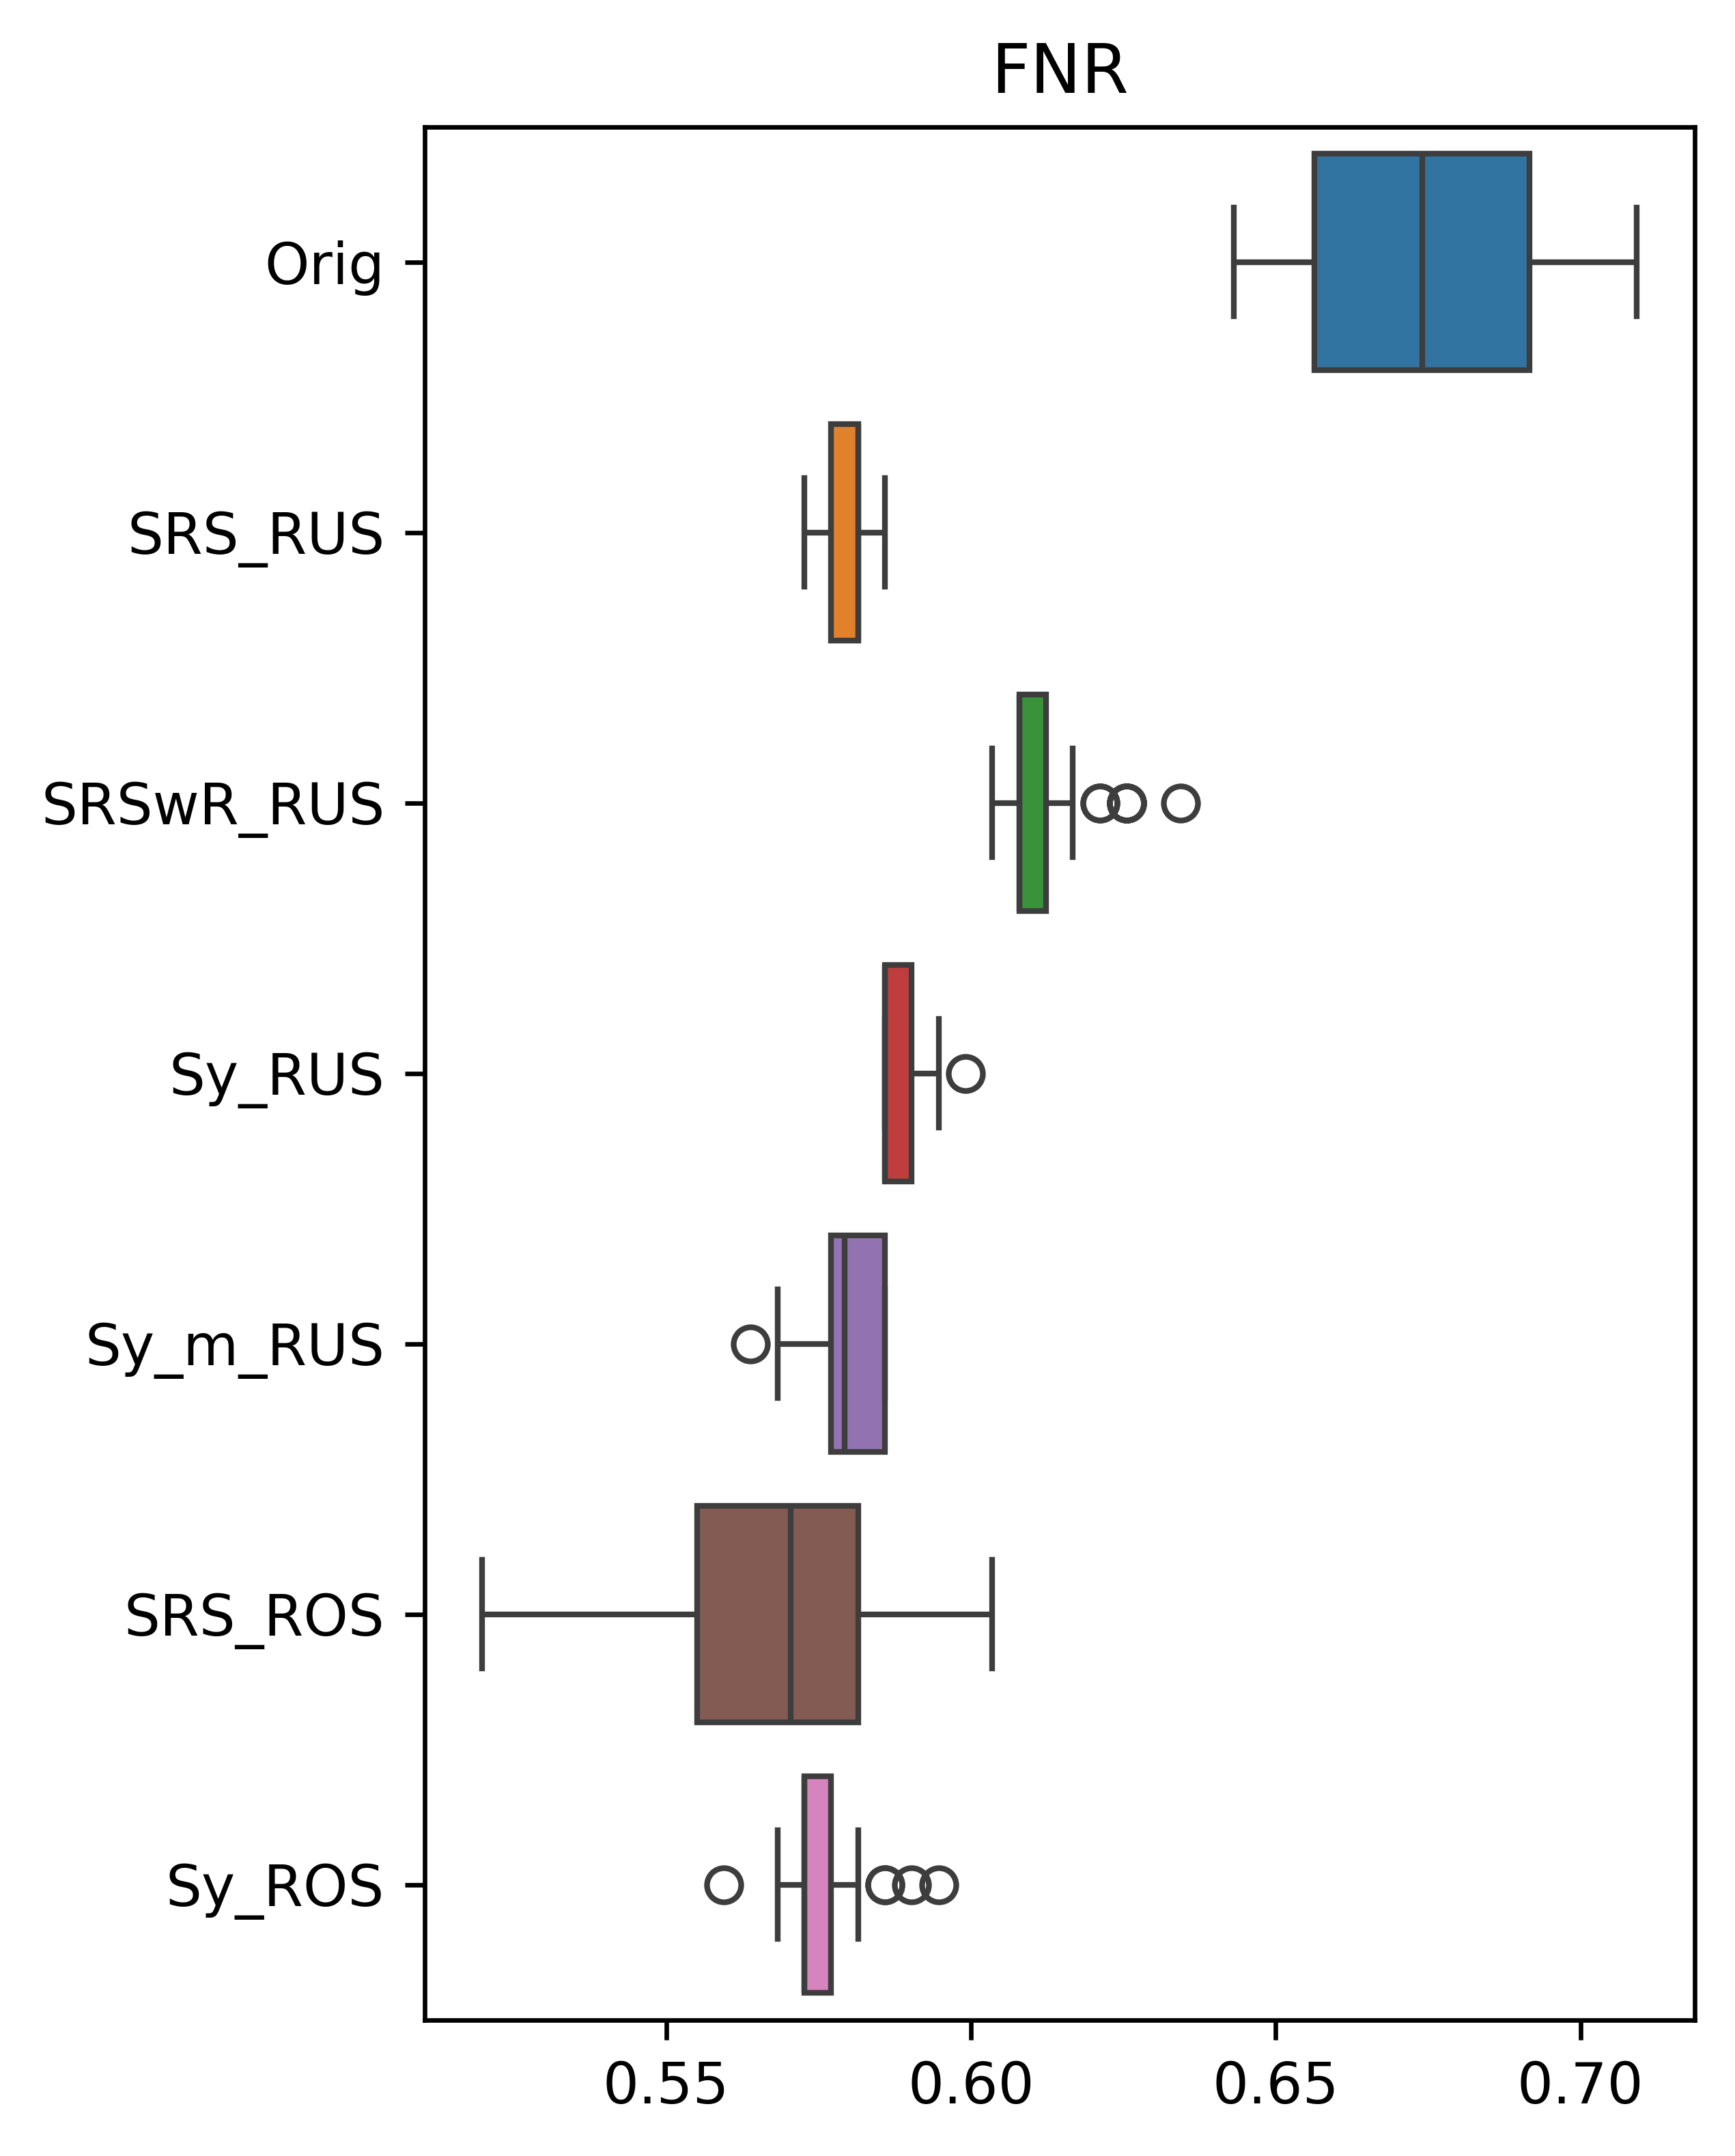

In [19]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [24]:
# data_orig = pd.read_csv(path_to_data + "Imbalanced_Extended.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data + "SRS_RUS_Extended.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data + "SRSwR_RUS_Extended.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data + "Sy_RUS_Extended.csv", sep=",", header=0)
# data_Sy2 = pd.read_csv(path_to_data + "Sy2_RUS_Extended.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data + "SRS_ROS_Extended.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data + "Sy_ROS_Extended.csv", sep=",", header=0)

data_orig = pd.read_csv("Credit_Imbalanced_Transductive.csv", sep=",", header=0)
data_SRS = pd.read_csv("Credit_SRS_RUS.csv", sep=",", header=0)
data_SRSwR = pd.read_csv("Credit_SRSwR_RUS.csv", sep=",", header=0)
data_Sy = pd.read_csv("Credit_Sy_RUS.csv", sep=",", header=0)


## TO DO SY2 (Multi Systematic!!)
# data_Sy2 = pd.read_csv("Credit_Sy2_RUS.csv", sep=",", header=0)

data_SRS_ROS = pd.read_csv("Credit_SRS_ROS.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv("Credit_Sy_ROS2.csv", sep=",", header=0)

data_SRS

,Unnamed: 0,Source time,FPR,TPR,FNR,TNR,Target time
0,0,14.256654,0.358272,0.641728,0.279743,0.720257,0.725009
1,1,11.590063,0.228662,0.771338,0.363344,0.636656,0.705707
2,2,10.458396,0.585880,0.414120,0.159164,0.840836,1.077954
3,3,11.073127,0.293203,0.706797,0.344051,0.655949,1.101564
4,4,9.190815,0.285827,0.714173,0.348875,0.651125,0.876115
5,5,10.652092,0.268704,0.731296,0.352090,0.647910,1.832600
6,6,11.728209,0.451528,0.548472,0.240354,0.759646,0.944003
7,7,12.918515,0.276870,0.723130,0.331994,0.668006,1.176464
8,8,13.382257,0.309009,0.690991,0.314309,0.685691,0.757639
9,9,13.010645,0.241834,0.758166,0.357717,0.642283,0.692743


Original (imbalanced) dataset:

In [25]:
print('SRS RUS', len(data_SRS))
print('SRSwR RUS', len(data_SRSwR))
print('Sy RUS', len(data_Sy))
# print('Sym RUS', len(data_Sy2))
print('SRS ROS', len(data_SRS_ROS))
print('Sy ROS', len(data_Sy_ROS))



SRS RUS 50
SRSwR RUS 50
Sy RUS 50
SRS ROS 50
Sy ROS 50


In [26]:
orig_FPR = data_orig['FPR']
orig_FNR = data_orig['FNR']
orig_time = data_orig['Source time']


Error type: FPR
Mean: 0.07596944151738667
Variance: 0.00011912648739393944
Variance of estimate: 2.3825297478787887e-06
Standard error: 0.0015435445402963884
95% Confidence Interval:  [ 0.07294409421840575 ,  0.0789947888163676 ]
-----------------------------
Error type: FNR
Mean: 0.5996945337620578
Variance: 0.001033861808285519
Variance of estimate: 2.0677236165710383e-05
Standard error: 0.004547222906974143
95% Confidence Interval:  [ 0.5907819768643885 ,  0.6086070906597272 ]
-----------------------------
Error type: Source time
Mean: 25.5948730745
Variance: 9.52669298067965
Variance of estimate: 0.190533859613593
Standard error: 0.43650184376883566
95% Confidence Interval:  [ 24.739329460713083 ,  26.450416688286918 ]
-----------------------------


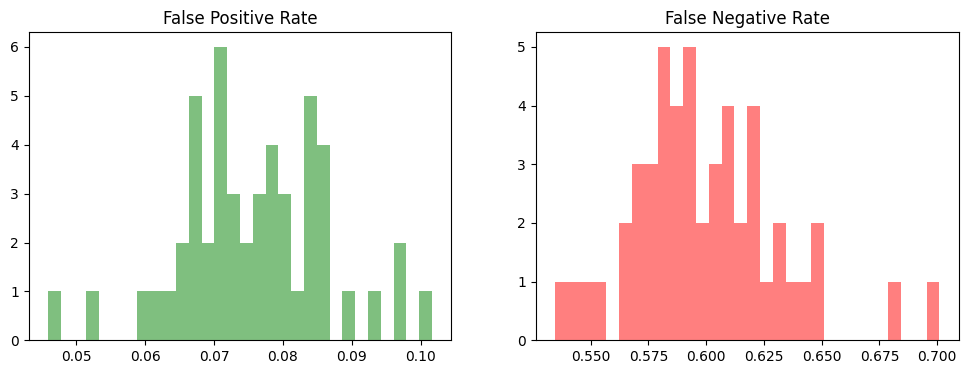

In [27]:
data = data_orig

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

Error type: FPR
Mean: 0.34508429926238143
Variance: 0.010435405079496916
Variance of estimate: 0.00020870810158993833
Standard error: 0.014446733249767517
95% Confidence Interval:  [ 0.3167687020928371 ,  0.3733998964319258 ]
-----------------------------
Error type: FNR
Mean: 0.30300643086816714
Variance: 0.004109664311129276
Variance of estimate: 8.219328622258551e-05
Standard error: 0.009066051302666751
95% Confidence Interval:  [ 0.28523697031494033 ,  0.32077589142139395 ]
-----------------------------
Error type: Source time
Mean: 14.432206240980008
Variance: 4.493469235196709
Variance of estimate: 0.08986938470393419
Standard error: 0.2997822287993973
95% Confidence Interval:  [ 13.84463307253319 ,  15.019779409426826 ]
-----------------------------


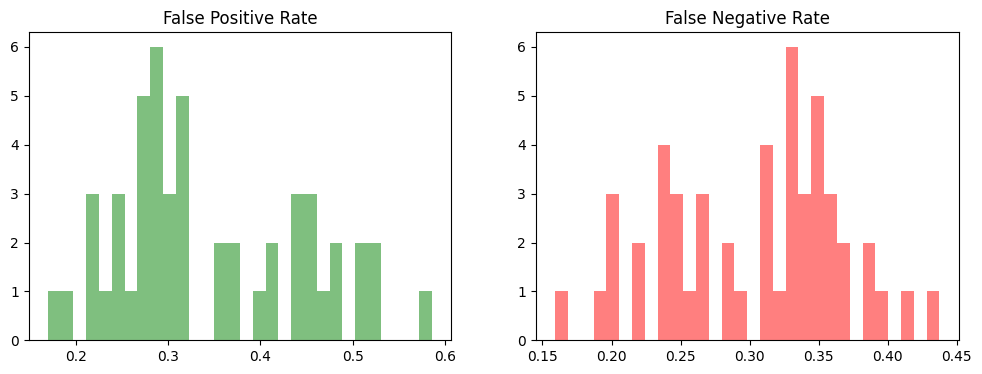

In [28]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.31789778714436245
Variance: 0.012526691104844752
Variance of estimate: 0.00025053382209689506
Standard error: 0.015828260235948077
95% Confidence Interval:  [ 0.2868743970819042 ,  0.3489211772068207 ]
-----------------------------
Error type: FNR
Mean: 0.32053054662379415
Variance: 0.005712169644690206
Variance of estimate: 0.00011424339289380412
Standard error: 0.010688470091355644
95% Confidence Interval:  [ 0.2995811452447371 ,  0.3414799480028512 ]
-----------------------------
Error type: Source time
Mean: 14.951323177339981
Variance: 6.090586389168253
Variance of estimate: 0.12181172778336506
Standard error: 0.34901536897873864
95% Confidence Interval:  [ 14.267253054141653 ,  15.63539330053831 ]
-----------------------------


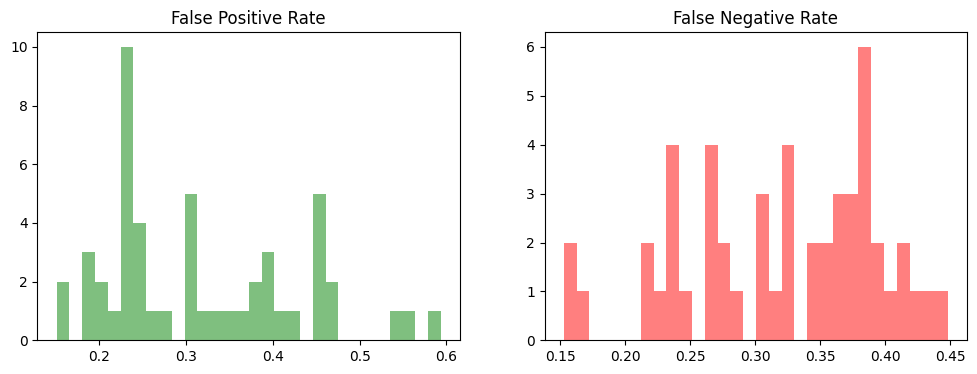

In [29]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.30486828240252895
Variance: 0.009696237766304306
Variance of estimate: 0.00019392475532608612
Standard error: 0.013925686888842723
95% Confidence Interval:  [ 0.2775739361003972 ,  0.3321626287046607 ]
-----------------------------
Error type: FNR
Mean: 0.32647909967845656
Variance: 0.004211936172821089
Variance of estimate: 8.423872345642179e-05
Standard error: 0.009178165582316643
95% Confidence Interval:  [ 0.30848989513711594 ,  0.3444683042197972 ]
-----------------------------
Error type: Source time
Mean: 14.478183472240007
Variance: 1.3754894706224157
Variance of estimate: 0.027509789412448315
Standard error: 0.16586075308055342
95% Confidence Interval:  [ 14.153096396202121 ,  14.803270548277892 ]
-----------------------------


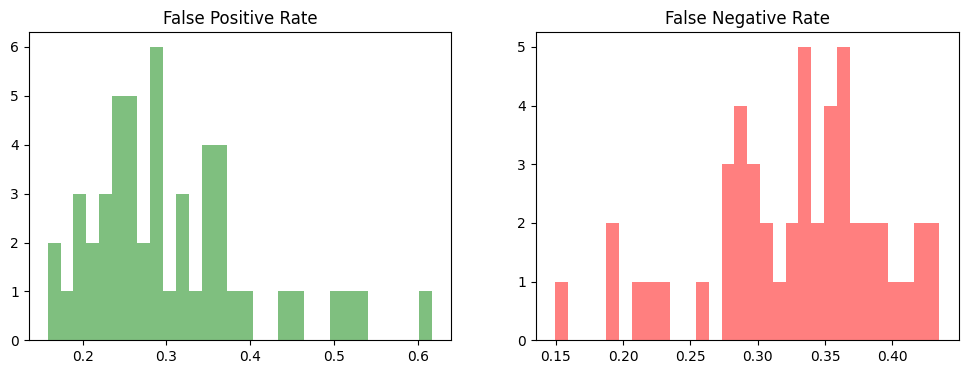

In [30]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

In [31]:
data_Sy2

NameError: name 'data_Sy2' is not defined

In [33]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

NameError: name 'data_Sy2' is not defined

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.3479399367755531
Variance: 0.010491452912770337
Variance of estimate: 0.00020982905825540674
Standard error: 0.01448547749490526
95% Confidence Interval:  [ 0.3195484008855388 ,  0.37633147266556743 ]
-----------------------------
Error type: FNR
Mean: 0.28763665594855303
Variance: 0.003871056693890632
Variance of estimate: 7.742113387781263e-05
Standard error: 0.008798927995944315
95% Confidence Interval:  [ 0.2703907570765022 ,  0.3048825548206039 ]
-----------------------------
Error type: Source time
Mean: 39.2443892983801
Variance: 47.14567080843459
Variance of estimate: 0.9429134161686917
Standard error: 0.9710372887632543
95% Confidence Interval:  [ 37.34115621240412 ,  41.147622384356076 ]
-----------------------------


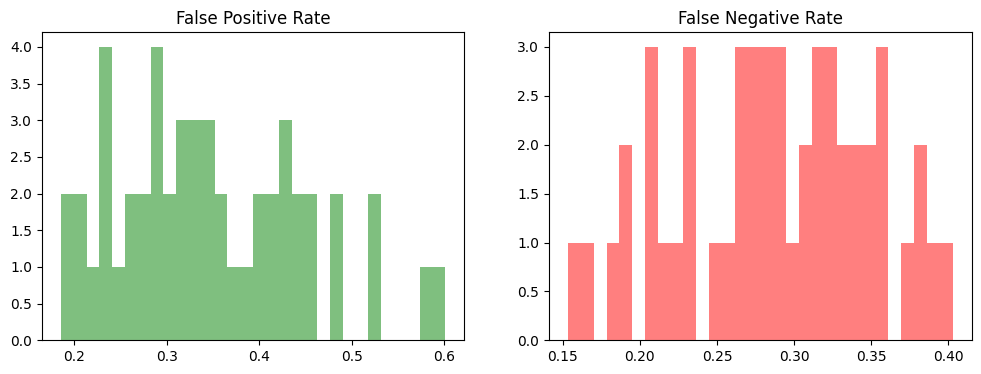

In [34]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

In [35]:
data_Sy_ROS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,36.825429,0.392518,0.607482,0.267685,0.732315,0.704088
1,1,30.849988,0.257376,0.742624,0.340836,0.659164,0.739149
2,2,34.695637,0.391201,0.608799,0.251608,0.748392,0.756987
3,3,30.753816,0.272392,0.727608,0.329582,0.670418,0.722004
4,4,29.860213,0.258693,0.741307,0.334405,0.665595,0.685640
5,5,31.452419,0.288988,0.711012,0.319936,0.680064,0.726323
6,6,28.114999,0.218651,0.781349,0.383441,0.616559,0.716481
7,7,27.103901,0.450211,0.549789,0.224277,0.775723,0.744972
8,8,30.785610,0.728135,0.271865,0.081994,0.918006,0.714109
9,9,30.126736,0.203372,0.796628,0.380225,0.619775,0.747964


Error type: FPR
Mean: 0.3218018967334036
Variance: 0.013249981775208659
Variance of estimate: 0.0002649996355041732
Standard error: 0.01627880940069553
95% Confidence Interval:  [ 0.2898954303080403 ,  0.35370836315876686 ]
-----------------------------
Error type: FNR
Mean: 0.30364951768488746
Variance: 0.004833115879906207
Variance of estimate: 9.666231759812414e-05
Standard error: 0.009831699629165047
95% Confidence Interval:  [ 0.28437938641172394 ,  0.322919648958051 ]
-----------------------------
Error type: Source time
Mean: 40.29579679641993
Variance: 56.21369768194386
Variance of estimate: 1.1242739536388773
Standard error: 1.0603178550033368
95% Confidence Interval:  [ 38.21757380061339 ,  42.37401979222647 ]
-----------------------------


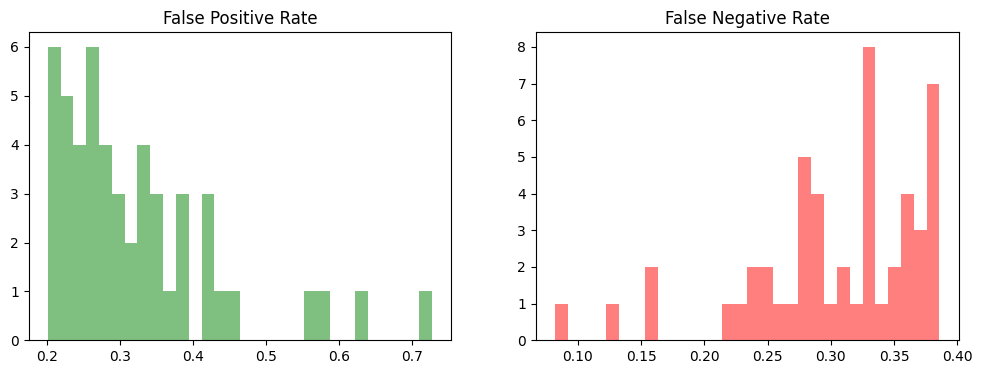

In [36]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [38]:
FPR = pd.DataFrame()

DF = FPR

DF['Orig'] = orig_FPR
DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
# DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

KeyError: 'Sy_m_RUS'

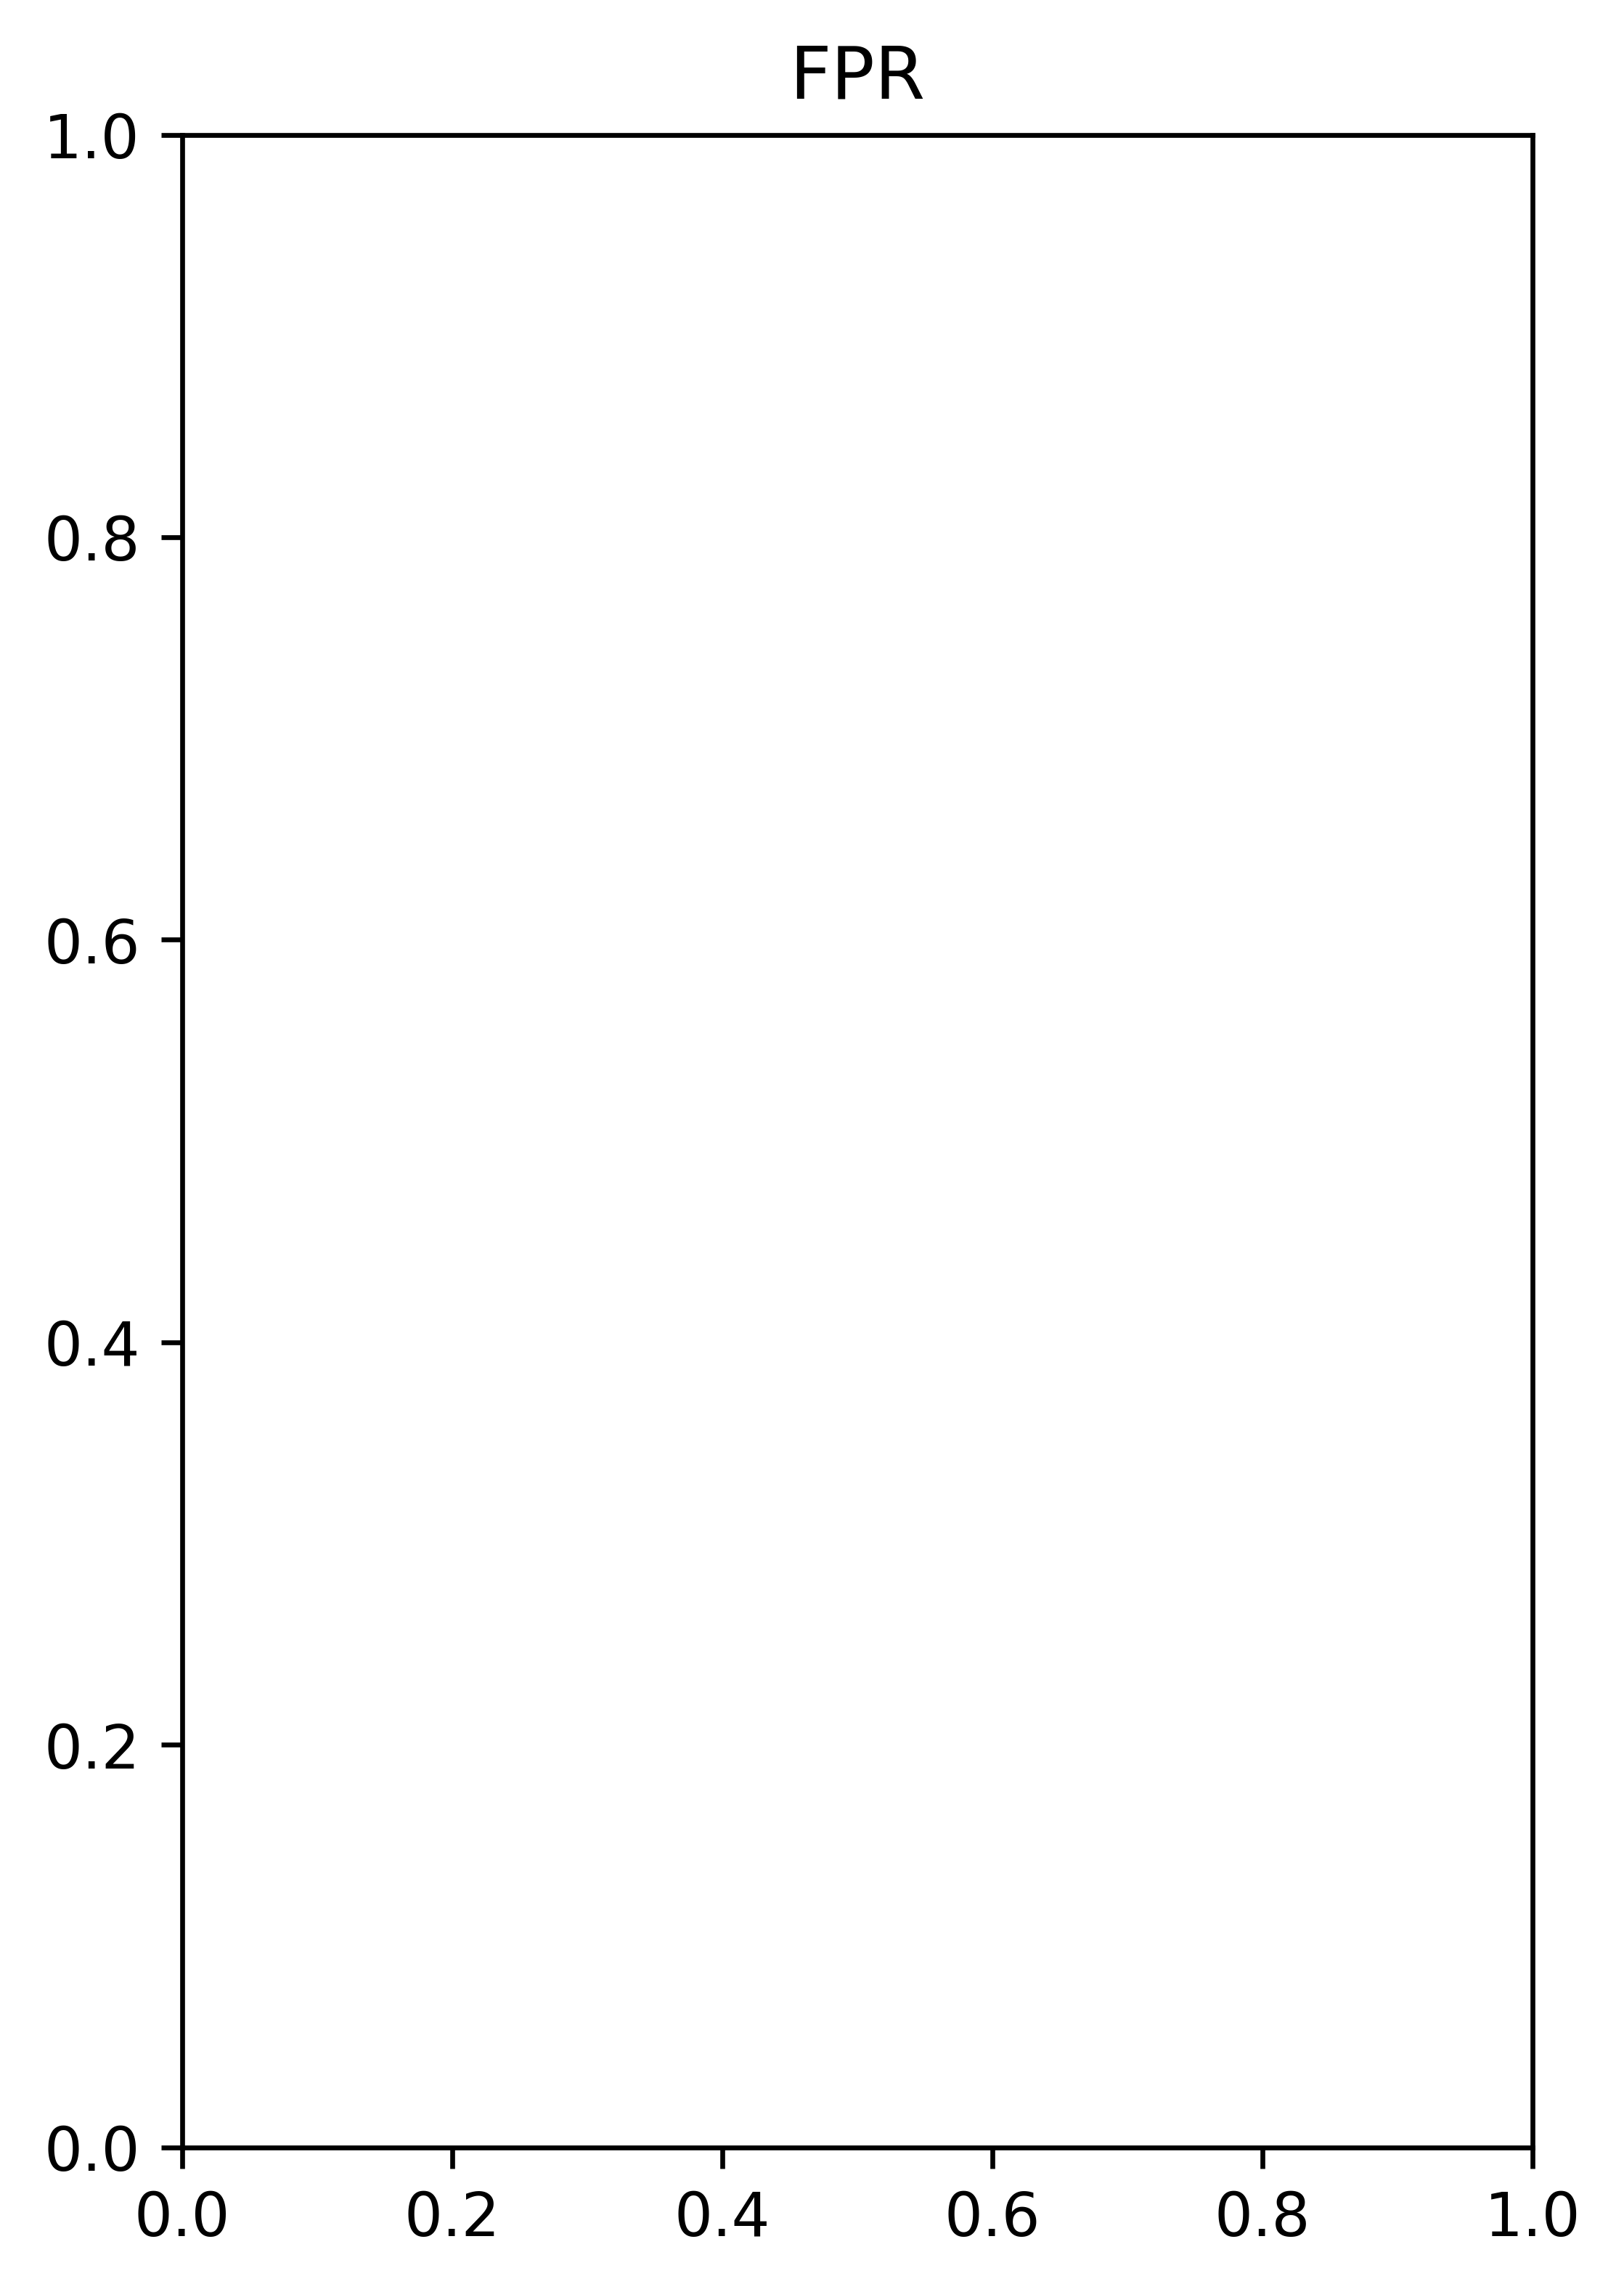

In [41]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [42]:
FNR = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_FNR
DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
# DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR

KeyError: 'Sy_m_RUS'

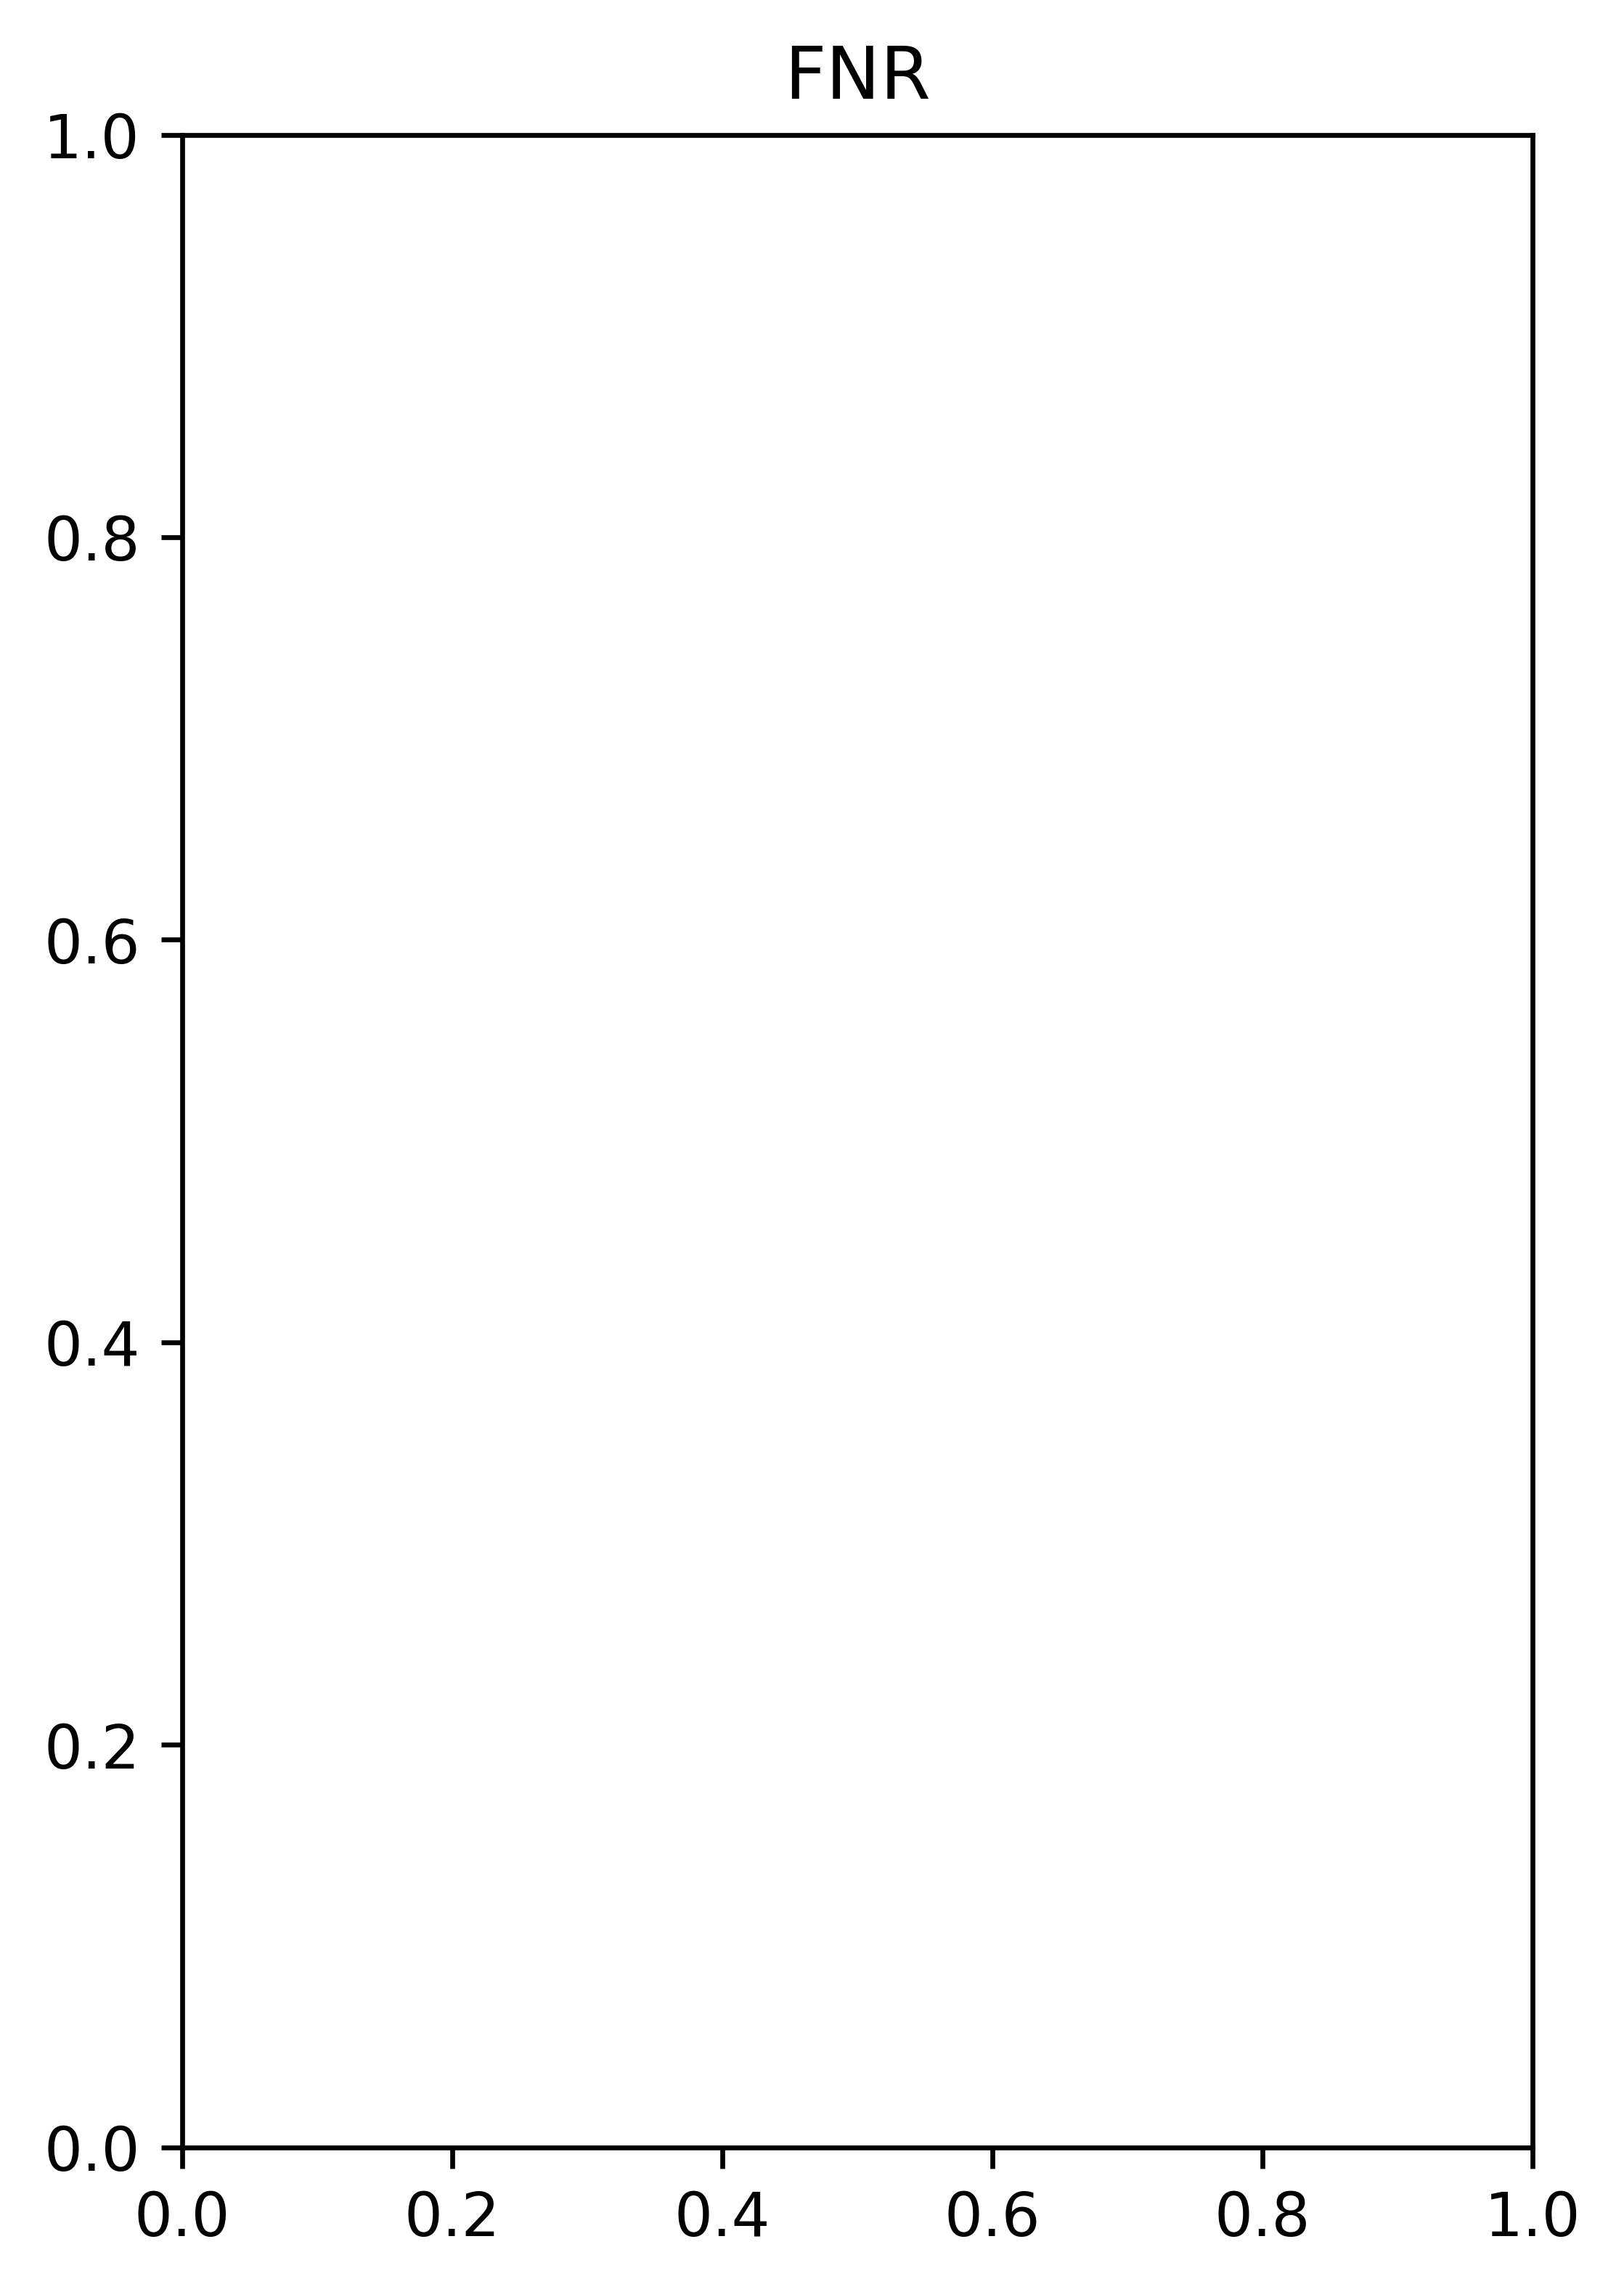

In [44]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [46]:
Time = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_time
DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
# DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time

KeyError: 'Sy_m_RUS'

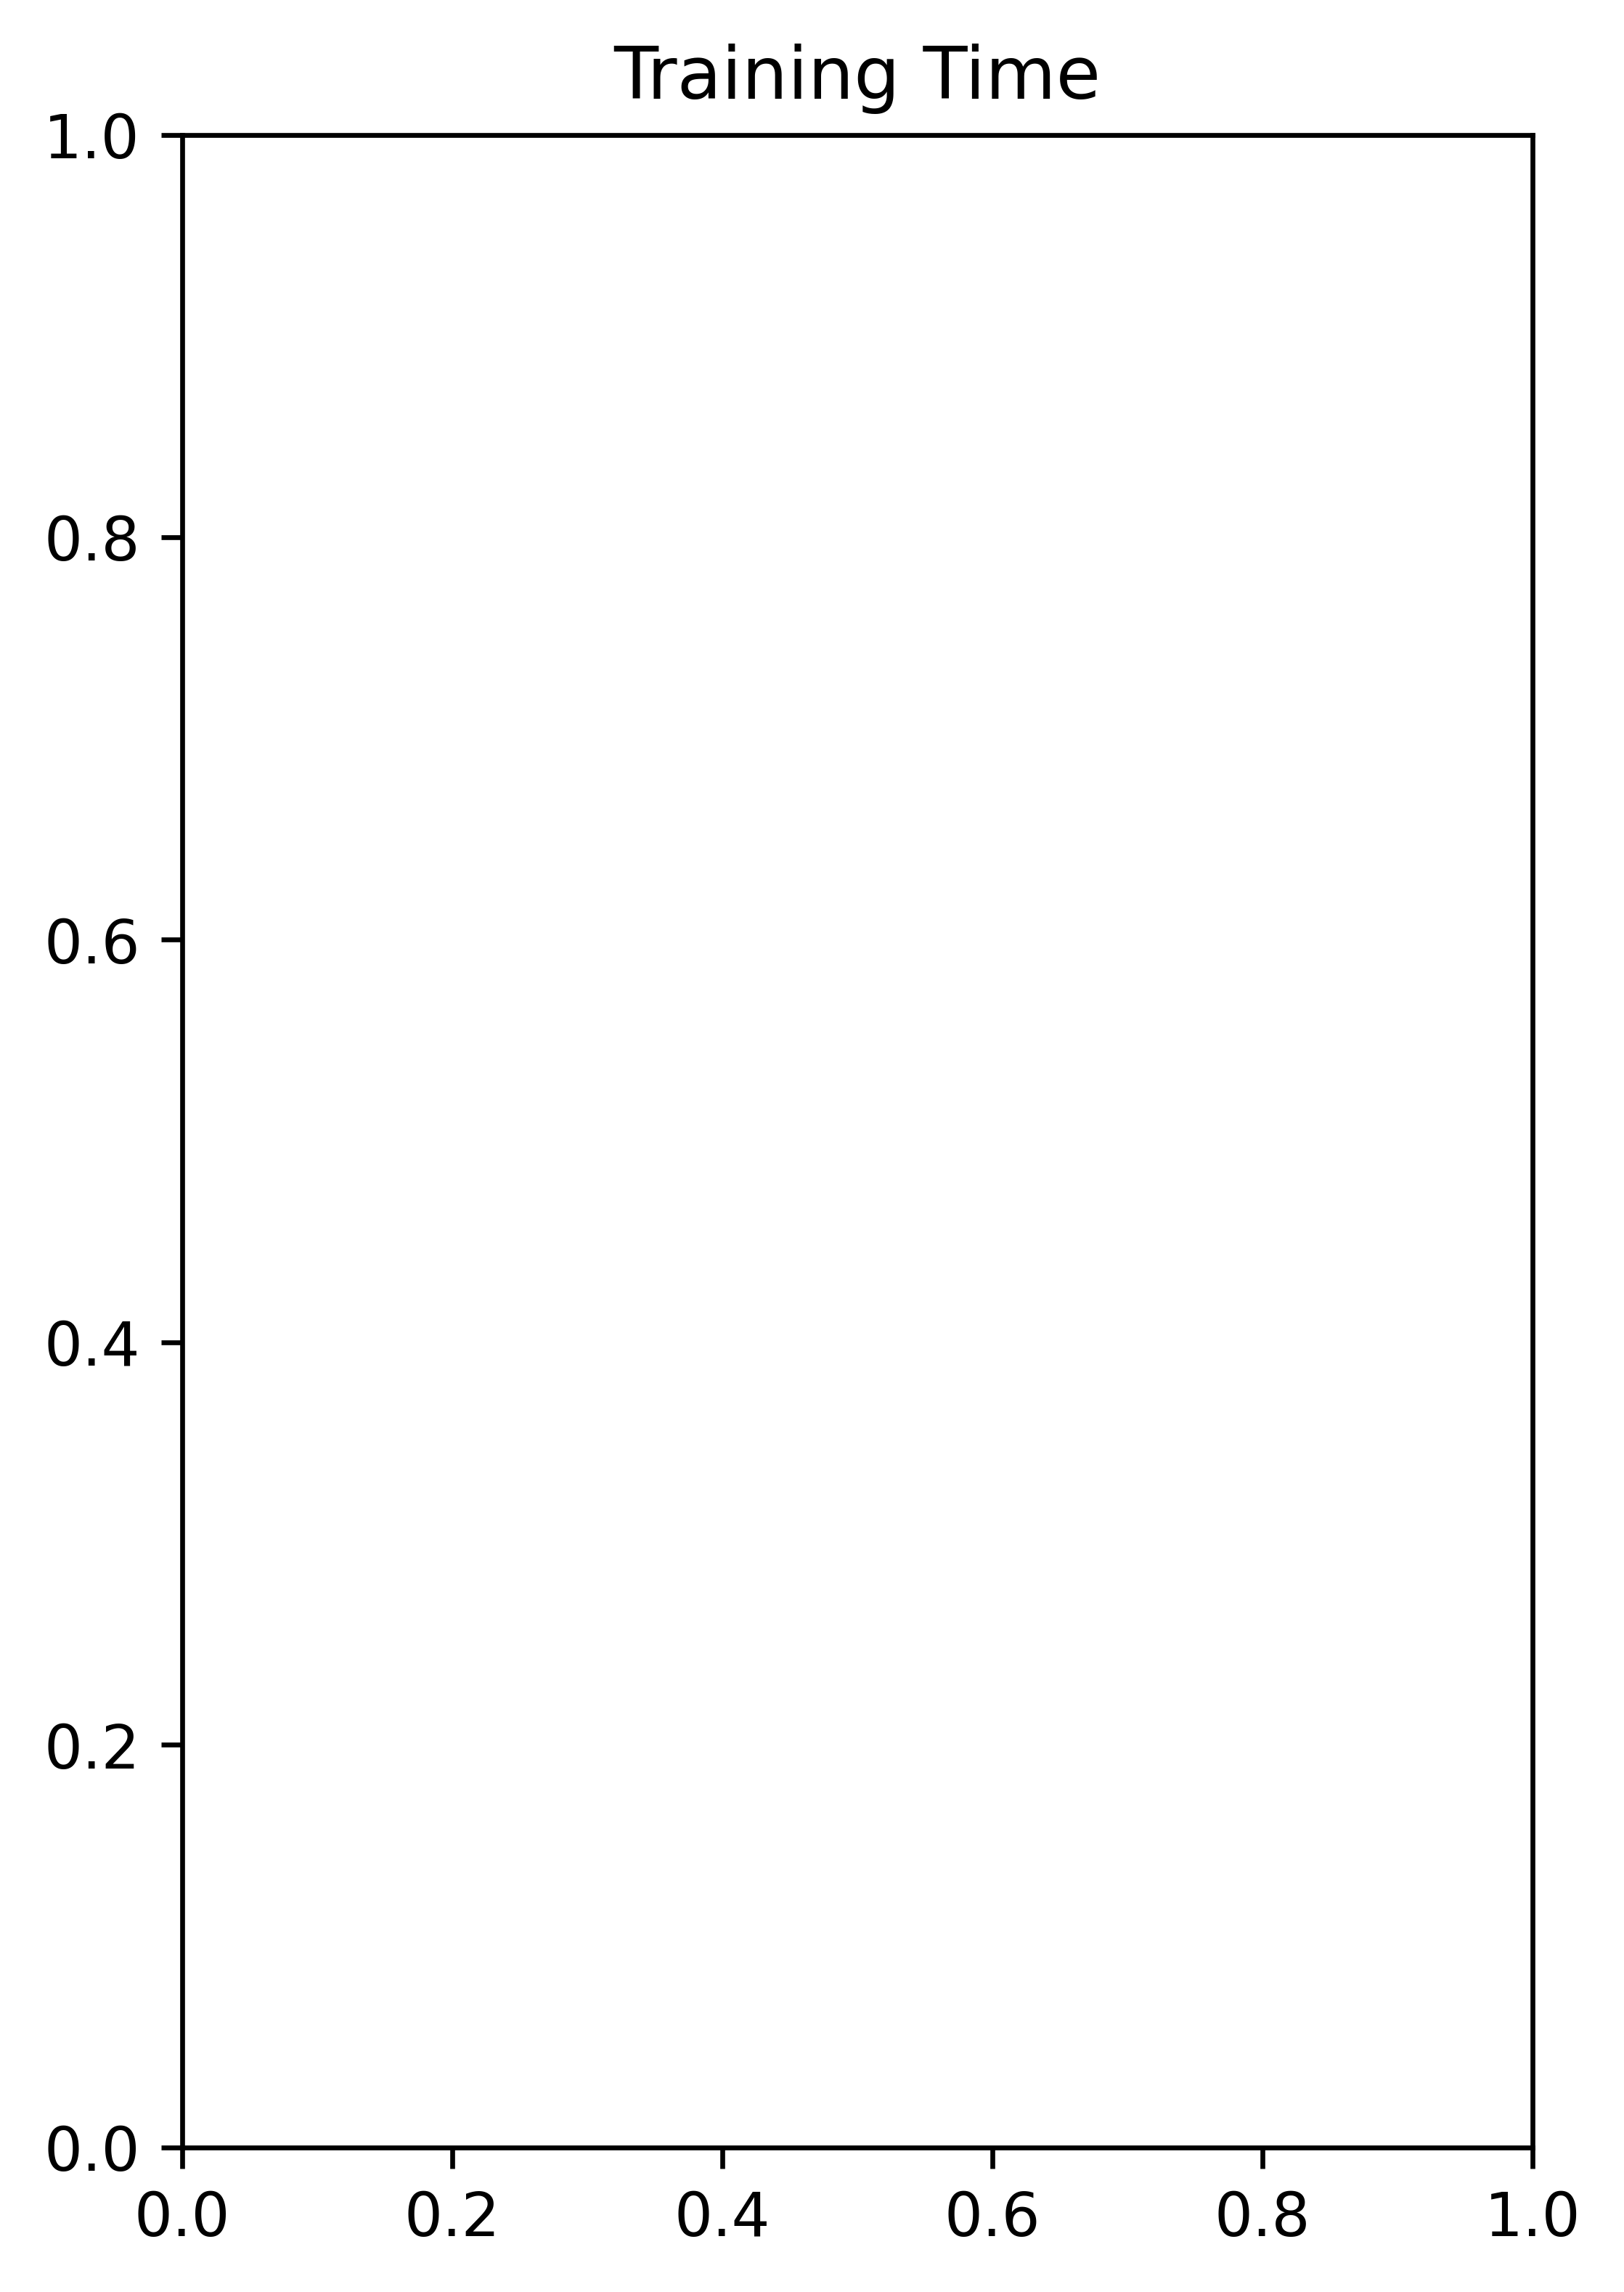

In [48]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')